In [2]:
import ehrdata as ed
import matplotlib.pyplot as plt
import numpy as np

import ehrapy as ep

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
current_notebook_dir = %pwd
_TEST_IMAGE_PATH = f"{current_notebook_dir}/../plot/_images"

In [5]:
edata = ed.dt.mimic_2().copy()
ed.infer_feature_types(edata)
edata = ep.pp.encode(edata, autodetect=True)

! File ehrapy_data/ehrapy_mimic2.csv already exists! Using already downloaded dataset...
! Features 'aline_flg', 'gender_num', 'service_num', 'day_icu_intime_num', 'hour_icu_intime', 'hosp_exp_flg', 'icu_exp_flg', 'day_28_flg', 'censor_flg', 'sepsis_flg', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'stroke_flg', 'mal_flg', 'resp_flg' were detected as categorical features stored numerically.Please verify and adjust if necessary using `ed.replace_feature_types`.


 Detected feature types for EHRData object with 1776 obs and 46 vars
╠══ 📅 Date features
╠══ 📐 Numerical features
║   ╠══ abg_count
║   ╠══ age
║   ╠══ bmi
║   ╠══ bun_first
║   ╠══ chloride_first
║   ╠══ creatinine_first
║   ╠══ hgb_first
║   ╠══ hospital_los_day
║   ╠══ hr_1st
║   ╠══ icu_los_day
║   ╠══ iv_day_1
║   ╠══ map_1st
║   ╠══ mort_day_censored
║   ╠══ pco2_first
║   ╠══ platelet_first
║   ╠══ po2_first
║   ╠══ potassium_first
║   ╠══ sapsi_first
║   ╠══ sodium_first
║   ╠══ sofa_first
║   ╠══ spo2_1st
║   ╠══ tco2_first
║   ╠══ temp_1st
║   ╠══ wbc_first
║   ╚══ weight_first
╚══ 🗂️ Categorical features
    ╠══ afib_flg (2 categories)
    ╠══ aline_flg (2 categories)
    ╠══ cad_flg (2 categories)
    ╠══ censor_flg (2 categories)
    ╠══ chf_flg (2 categories)
    ╠══ copd_flg (2 categories)
    ╠══ day_28_flg (2 categories)
    ╠══ day_icu_intime (7 categories)
    ╠══ day_icu_intime_num (7 categories)
    ╠══ gender_num (2 categories)
    ╠══ hosp_exp_flg (2 categories)
    ╠══ hour_icu_intime (24 categories)
    ╠══ icu_exp_flg (2 categories)
    ╠══ liver_flg (2 categories)
    ╠══ mal_flg (2 categories)
    ╠══ renal_flg (2 categories)
    ╠══ resp_flg (2 categories)
    ╠══ sepsis_flg (1 categories)
    ╠══ service_num (2 categories)
    ╠══ service_unit (3 categories)
    ╚══ stroke_flg (2 categories)

In [6]:
ep.pp.knn_impute(edata)
ep.pp.log_norm(edata, offset=1)
ep.pp.neighbors(edata, method="gauss")
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.tl.diffmap(edata, n_comps=10)

edata.uns["iroot"] = np.flatnonzero(edata.obs["leiden_0_5"] == "0")[0]

ep.tl.dpt(edata, n_branchings=2)

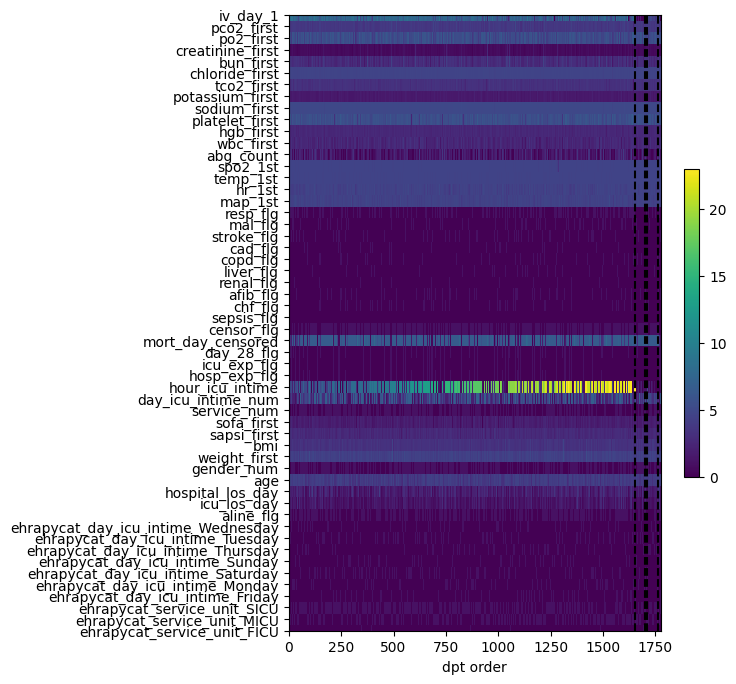

In [7]:
ep.pl.dpt_timeseries(edata, show=False)
fig = plt.gcf()

In [8]:
fig.savefig(f"{_TEST_IMAGE_PATH}/dpt_timeseries_expected.png", dpi=80)